## Проблема подглядывания за результатами AB-тестов

Суть проблемы: нельзя проводить AB-тест до тех пор, пока не получится стат.значимое p_value.  
Время окончания эксперимента должно быть определено заранее и не должно зависеть от значений p_value.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline  


In [2]:
# Кол-во дней в эксперименте
days = 100

In [3]:
# Параметры выборок - они идентичны.
# Ежедневно будем добавлять по 100 наблюдений в тестовую и контрольную выборку
mu_control, sigma_control, n_control          = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100

In [46]:
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [51]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'

    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'

    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value, 
                          user_data[user_data.group == 'control'].value)

    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1


In [52]:
daily_data.reset_index(inplace=True)
stat_result.reset_index(inplace=True)

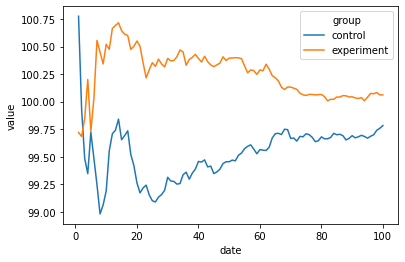

In [53]:
ax = sns.lineplot(data=daily_data, x="date", y="value", hue='group')

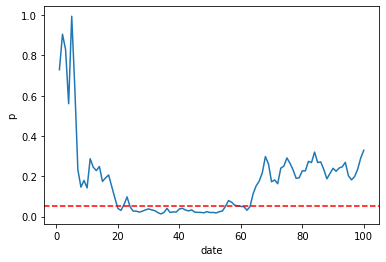

In [54]:
ax = sns.lineplot(data=stat_result, x="date", y="p")
ax.axhline(0.05, ls='--', color='red')

### Выводы:

Как видно из графика, p_value длительное время находился ниже значения 0.05.  
Если бы мы остановили эксперимент при достижении p_value значения ниже 0.05,  
то мы бы зафиксировали стат. значимое различие там, где его нет.

Вероятность того, что мы зафиксируем p_value ниже 0.05 **один раз** ниже, чем если мы будем пытаться зафиксировать его **многократно**. Чем больше попыток, тем выше шанс увидеть любое нужное значение p_value.

## Как распределены значения p_value?

In [56]:
p_values = []

In [57]:
days = 10000

In [58]:
# Выборки из одинаковых распределений
mu_control, sigma_control, n_control = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100

In [59]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    fit = stats.ttest_ind(daily_data_control, daily_data_experiment)
    
    p_values.append(fit[1])

<AxesSubplot:ylabel='Count'>

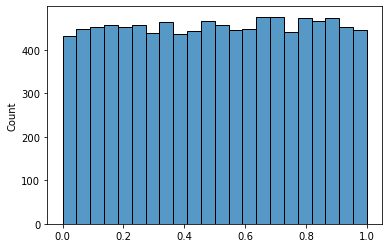

In [65]:
sns.histplot(p_values)

Выводы:  
Распределение p_value равномерное